# 課題6: ディープラーニングのモデルを構築しよう

今回の課題では手書き数字の認識を、CNNを用いて行います。ただし本課題では、レッスン本編で用いたscikit-learnのものではなく、Kerasのデータセットに含まれている、より大きいサイズの手書き数字データで課題を進めていただきます。

下記にKerasから手書き数字のデータセットをダウンロードするコードが記載されています。このデータを用いてディープラーニングのモデルを構築してください。

今までのレッスンで学んだ内容を踏まえ、各セルにコードを埋めていってください。

（※`変更しないでください`と書かれたセルには、コードの追記変更をしないでください）

## 1. ライブラリのimport

In [8]:
!python -m pip install --no-cache-dir tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
    --------------------------------------- 6.0/331.9 MB 33.5 MB/s eta 0:00:10
   - -------------------------------------- 11.3/331.9 MB 27.1 MB/s eta 0:00:12
   - -------------------------------------- 16.0/331.9 MB 25.8 MB/s eta 0:00:13
   -- ------------------------------------- 21.2/331.9 MB 25.8 MB/s eta 0:00:13
   --- ------------------------------------ 27.0/331.9 MB 25.9 MB/s eta 0:00:12
   --- ------------------------------------ 32.5/331.9 MB 26.1 MB/s eta 0:00:12
   ---- ----------------------------------- 38.0/331.9 MB 26.0 MB/s eta 0:00:12
   ----- ---------------------------------- 43.8/331.9 MB 26.0 MB/s eta 0:00:12
   ----- ---------------------------------- 49.0/331.9 MB 26.2 MB/s eta 0:00:11
   ------ --------------------------------- 57.1/331.9 MB 27.4 MB/s eta 0:00:11
   ------- -------------------------------- 65.0/331.9 MB 28.4 MB/s eta 0:00:10
   -------- ------------------------------- 72.9/3

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# （変更しないでください）

# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読み込み

Kerasのデータセットは、あらかじめTraining setとTest setに分けられています。戻り値はタプルで取得できます。

In [10]:
# Kerasに添付されている手書き数字のデータセットをダウンロードして読み込む
# （変更しないでください）
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 3. データの確認

In [11]:
# X_train, Y_train, X_test, Y_testの形状を確認
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

print("-" * 30)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)
------------------------------


In [12]:
# X_trainの先頭1行を表示
print("X_train[0] の先頭1行 (28ピクセル分):\n", X_train[0][0])

X_train[0] の先頭1行 (28ピクセル分):
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
# Y_trainの先頭1行を表示
print("\nY_train[0] (1枚目の正解ラベル):", Y_train[0])


Y_train[0] (1枚目の正解ラベル): 5


データセットを可視化して表示します。

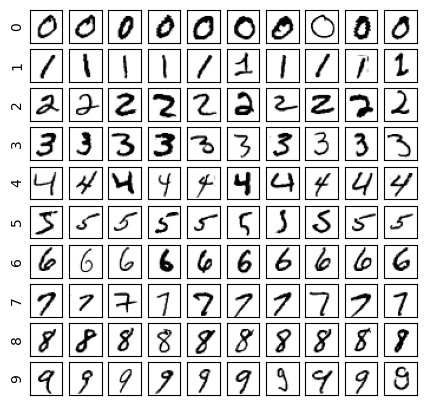

In [14]:
# （変更しないでください）

# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [15]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入
X_train2 = X_train.reshape(len(X_train), 28, 28, 1)

# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)

In [16]:
from tensorflow.keras.utils import to_categorical

# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
Y_train2 = to_categorical(Y_train, num_classes=10)

# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = to_categorical(Y_test, num_classes=10)

In [17]:
# X_train2, Y_train2, X_test2, Y_test2の形状を確認
print("X_train2 shape:", X_train2.shape)
print("Y_train2 shape:", Y_train2.shape)
print("---")
print("X_test2 shape:", X_test2.shape)
print("Y_test2 shape:", Y_test2.shape)

X_train2 shape: (60000, 28, 28, 1)
Y_train2 shape: (60000, 10)
---
X_test2 shape: (10000, 28, 28, 1)
Y_test2 shape: (10000, 10)


In [18]:
# train_test_splitを使い、学習データと検証データに7:3（検証データが3割）で分割する
# （詳細：データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割）
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(
    X_train2, Y_train2, test_size=0.3, random_state=0
)

In [19]:
# X_train2, Y_train2, X_valid2, Y_valid2, X_test2, Y_test2の形状を確認
print("--- Training Data ---")
print(f"X_train2: {X_train2.shape}")
print(f"Y_train2: {Y_train2.shape}")

print("\n--- Validation Data ---")
print(f"X_valid2: {X_valid2.shape}")
print(f"Y_valid2: {Y_valid2.shape}")

print("\n--- Test Data ---")
print(f"X_test2:  {X_test2.shape}")
print(f"Y_test2:  {Y_test2.shape}")

--- Training Data ---
X_train2: (42000, 28, 28, 1)
Y_train2: (42000, 10)

--- Validation Data ---
X_valid2: (18000, 28, 28, 1)
Y_valid2: (18000, 10)

--- Test Data ---
X_test2:  (10000, 28, 28, 1)
Y_test2:  (10000, 10)


## 5. モデルの構築

Kerasを使ってモデルを構築してみましょう。以下を条件とします：

- CNN(Conv2D)を使うこと
- 正解率(accuracy)が50%以上であること

場合によっては、学習にものすごく時間がかかる場合もあります。適宜、パラメータ数を調整して行なってください。

In [20]:
# （モデルの初期化から構築までのコードを、このセル以下に記述してください）
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. モデルの初期化
model = Sequential()

# 2. モデルの構築
# 畳み込み層：特徴を抽出（28x28x1 の入力を受け取る）
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# プーリング層：情報を圧縮
model.add(MaxPooling2D(pool_size=(2, 2)))
# 平坦化：多次元を1次元に変換
model.add(Flatten())
# 全結合層：分類のための学習
model.add(Dense(128, activation='relu'))
# 出力層：10種類の数字に分類
model.add(Dense(10, activation='softmax'))

# 3. モデルのコンパイル（学習ルールの設定）
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

c:\Users\kwata\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# モデルの構造を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
%%time
# 学習の実施(ものすごく時間がかかる場合もあります)
history = model.fit(X_train2, Y_train2, 
                    epochs=5, 
                    batch_size=128, 
                    validation_data=(X_valid2, Y_valid2), 
                    verbose=1)

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8956 - loss: 1.4525 - val_accuracy: 0.9558 - val_loss: 0.1580
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9715 - loss: 0.0990 - val_accuracy: 0.9709 - val_loss: 0.1171
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9832 - loss: 0.0555 - val_accuracy: 0.9732 - val_loss: 0.1123
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9871 - loss: 0.0401 - val_accuracy: 0.9744 - val_loss: 0.1063
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9770 - val_loss: 0.0994
CPU times: total: 3min 43s
Wall time: 25.1 s


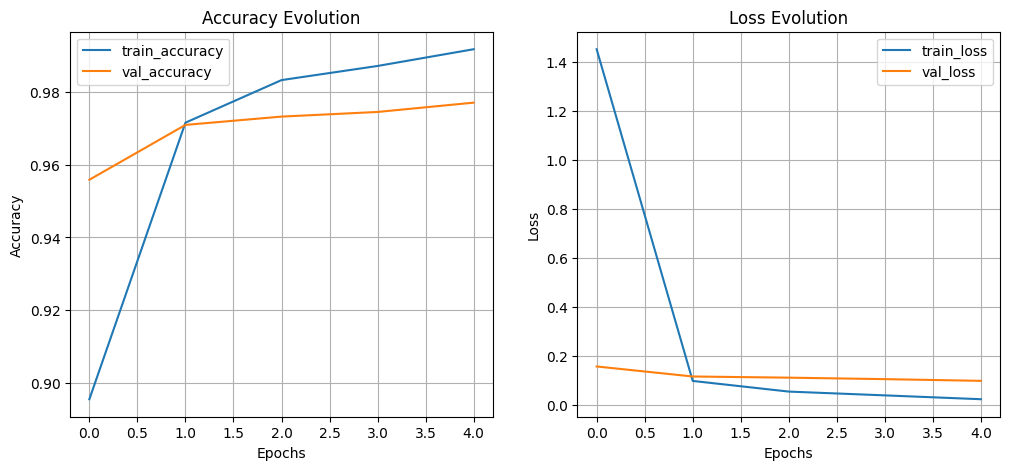

In [23]:
# 学習過程をグラフ表示
# 1. グラフのサイズを設定
plt.figure(figsize=(12, 5))

# 2. 正解率（Accuracy）の推移
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# 3. 損失（Loss）の推移
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [24]:
# predictを使い、X_test2をもとに予測した結果を、
# カテゴリー変数へ復元してY_pred2に代入
import numpy as np

# predictを使い、X_test2をもとに予測した結果を取得
# 出力は各クラスの確率 (例: [0.01, 0.02, 0.95, ...])
Y_pred_prob = model.predict(X_test2)

# 最も確率が高いインデックス（数字）を抽出して、カテゴリー変数へ復元
Y_pred2 = np.argmax(Y_pred_prob, axis=1)

# 確認のため先頭5件を表示
print("予測結果（先頭5件）:", Y_pred2[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
予測結果（先頭5件）: [7 2 1 0 4]


In [25]:
# Y_test2もカテゴリー変数へ復元して、Y_test2_ に代入
import numpy as np
Y_test2_ = np.argmax(Y_test2, axis=1)
# 確認のため先頭5件を表示
print("正解ラベル（先頭5件）:", Y_test2_[:5])

正解ラベル（先頭5件）: [7 2 1 0 4]


In [26]:
from sklearn.metrics import classification_report

# classification_reportを使い、モデルの評価を実施
print(classification_report(Y_test2_, Y_pred2))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.96      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

